In [1]:
from importlib import reload
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

from smlm_dl import dataset, model, trainer, config, util
import numpy as np

{3: -0.14585934680076396, 4: -0.2386038464737179, 5: 2, 6: 0.4681460464953091, 7: 0.11777857639542388, 8: 0.23383095477791938, 9: 0.3388767729585215, 10: 0.4199086028721163, 11: -0.003521460062847148, 12: -0.024921469872789093, 13: 0.002832338359860076, 14: -0.30583667385320257, 15: 0.3421119940191848, 16: 0.015326612185681321, 17: -0.2660937047019247, 18: -0.47914854283411956, 19: 0.08763468626784554, 20: 0.32680507168508033}


d:\github\smlm-dl\smlm_dl\dataset.py:423: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


62:	 [id = 62.000,], [A = 1197.443,], [bg = 51.165,], [x = -1.772,], [y = 5.878,], [z = 2.315,],
68:	 [id = 68.000,], [A = 1564.829,], [bg = 39.251,], [x = -0.161,], [y = -5.443,], [z = 4.865,],
66:	 [id = 66.000,], [A = 1114.418,], [bg = 15.501,], [x = -7.347,], [y = 4.403,], [z = 8.024,],
12:	 [id = 12.000,], [A = 1774.217,], [bg = 36.413,], [x = -3.616,], [y = -9.263,], [z = 6.416,],
120:	 [id = 120.000,], [A = 1414.940,], [bg = 88.302,], [x = 10.516,], [y = -4.144,], [z = -4.033,],
14:	 [id = 14.000,], [A = 1355.638,], [bg = 38.785,], [x = 7.287,], [y = 0.141,], [z = -4.482,],
108:	 [id = 108.000,], [A = 1069.514,], [bg = 97.618,], [x = -6.310,], [y = -4.519,], [z = -1.177,],
60:	 [id = 60.000,], [A = 744.886,], [bg = 70.300,], [x = -7.737,], [y = 9.674,], [z = 8.237,],
37:	 [id = 37.000,], [A = 724.601,], [bg = 73.784,], [x = 5.800,], [y = 8.040,], [z = 4.276,],
73:	 [id = 73.000,], [A = 1809.741,], [bg = 6.561,], [x = -5.533,], [y = 0.744,], [z = 7.258,],
126:	 [id = 126.000,], [

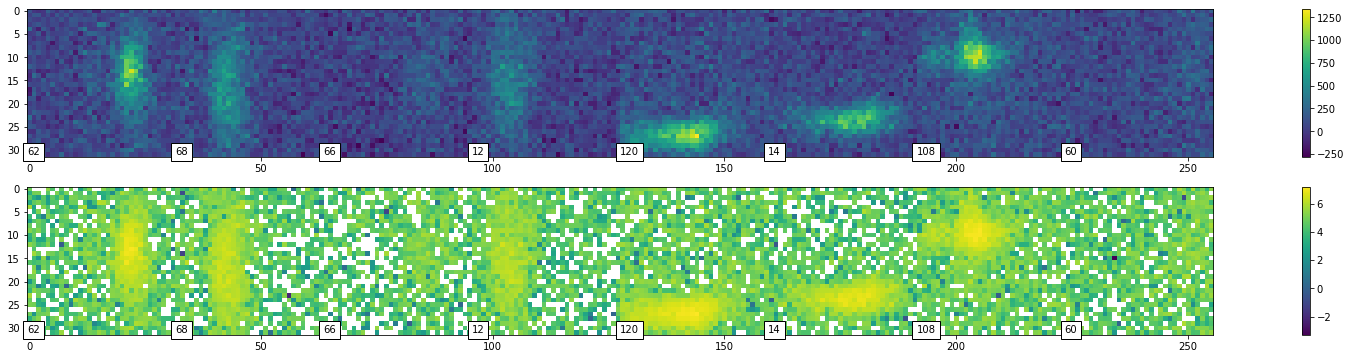

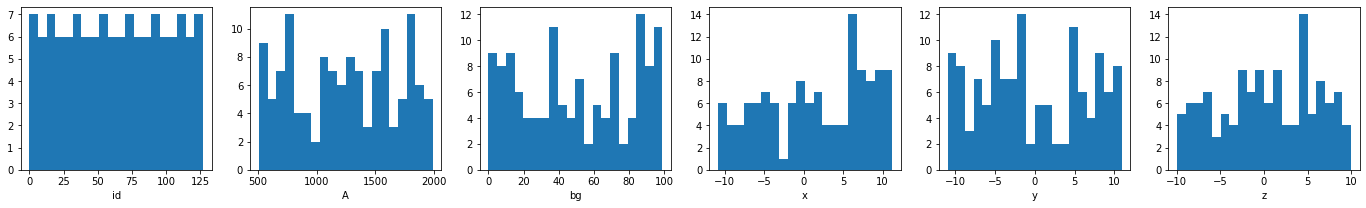

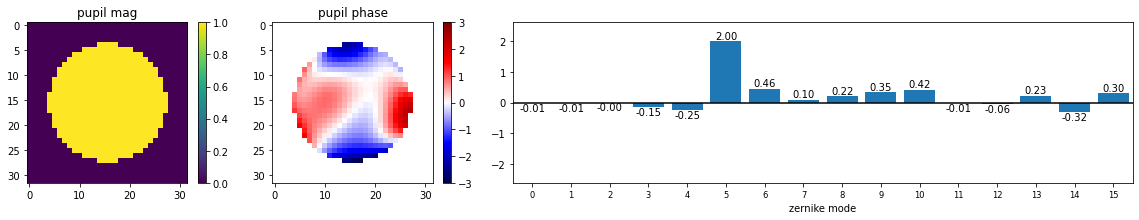

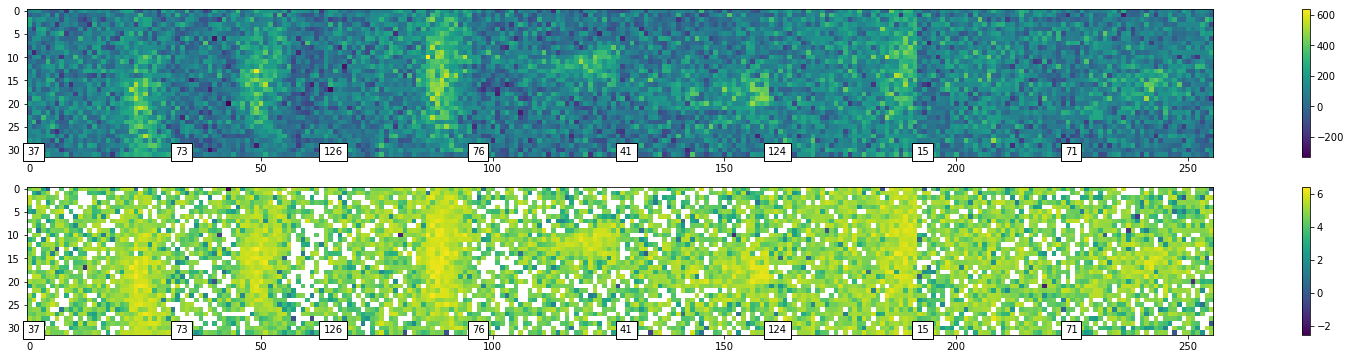

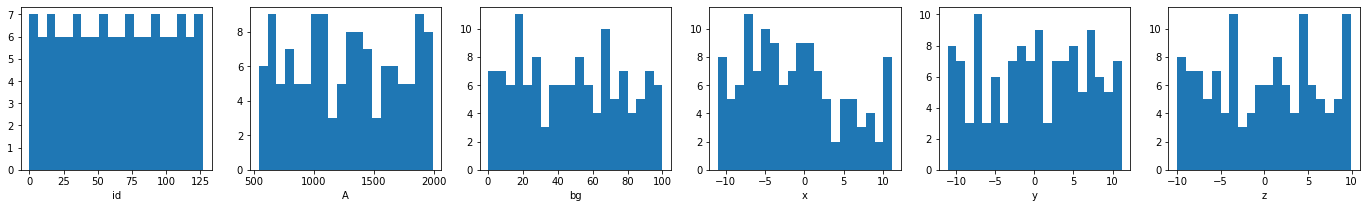

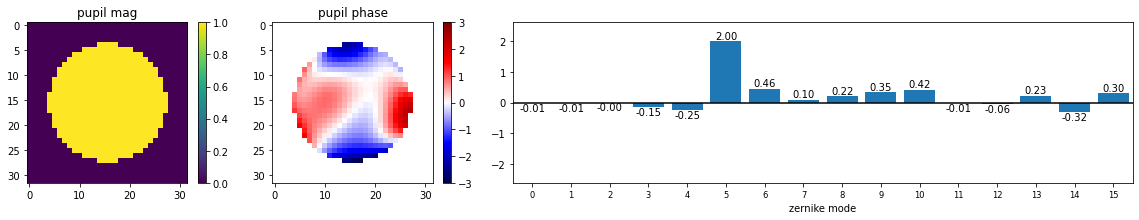

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_params': {'z':[-10,10]},
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    # 'padding': (4,4),
    # 'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

need slicing: False
CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-04-06_18-58-44_DESKTOP-7NNT713\model.ptm


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-58-44_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.scale.weight'])
optimizer_state_dict: dict_keys(['state', 'param_groups'])
loss_function_state_dict: odict_keys([])
log_path: D:\Pytorch\runs\2022-04-06_18-58-44_DESKTOP-7NNT713
epoch: 1
loss: 44648.91015625


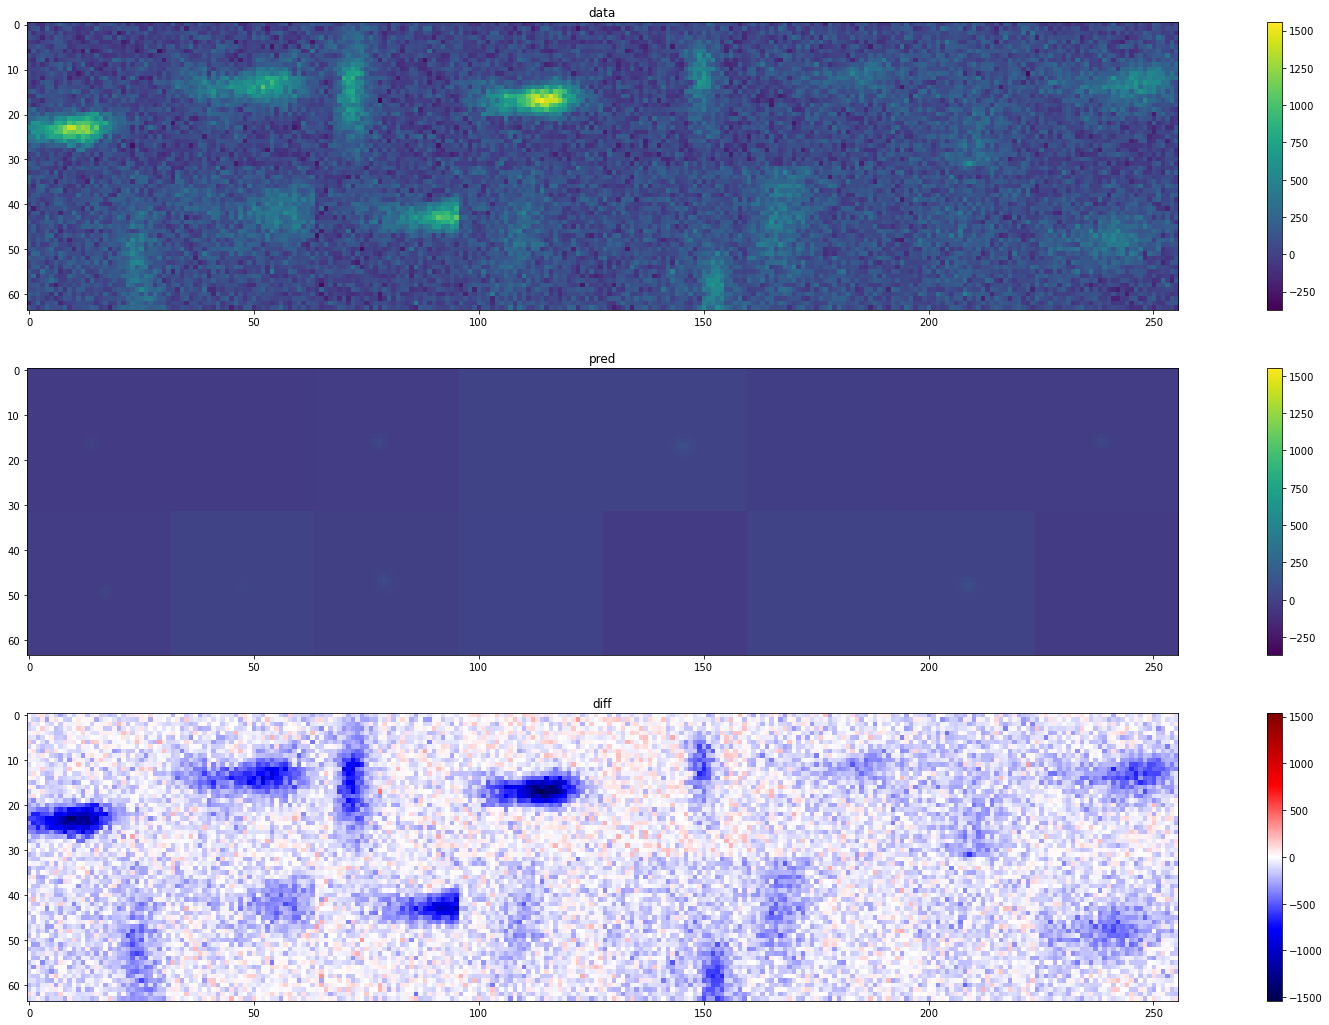

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":len(train_dataloader.dataset)
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
# model.check_model(fitting_model, )

# filepath = training.current_state["log_path"]
# print(filepath)
# training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
# training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
# training.train_data_loader = train_dataloader
# training.valid_data_loader = valid_dataloader
# training.train_and_validate(2, label="test")
# model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-04-06_18-58-45_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-58-45_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight', 'enc

d:\github\smlm-dl\smlm_dl\model\base.py:145: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img))


D:\Pytorch\runs\2022-04-06_18-58-45_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2022-04-06_18-58-45_DESKTOP-7NNT713\model.ptm, last modified: Wed Apr  6 18:58:45 2022
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─DirectMapperModel: 1-1                 --
│    └─ModuleDict: 2-1                   --
├─Gaussian2DRenderer: 1-2                --
├─ConvImageEncoderModel: 1-3             --
│    └─ModuleDict: 2-2                   --
│    │    └─Sequential: 3-1              2,480
│    │    └─Sequential: 3-2              13,888
│    │    └─Sequential: 3-3              55,424
│    └─ModuleDict: 2-3                   --
│    └─ModuleDict: 2-4                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDi

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-58-48_DESKTOP-7NNT713_test\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight',

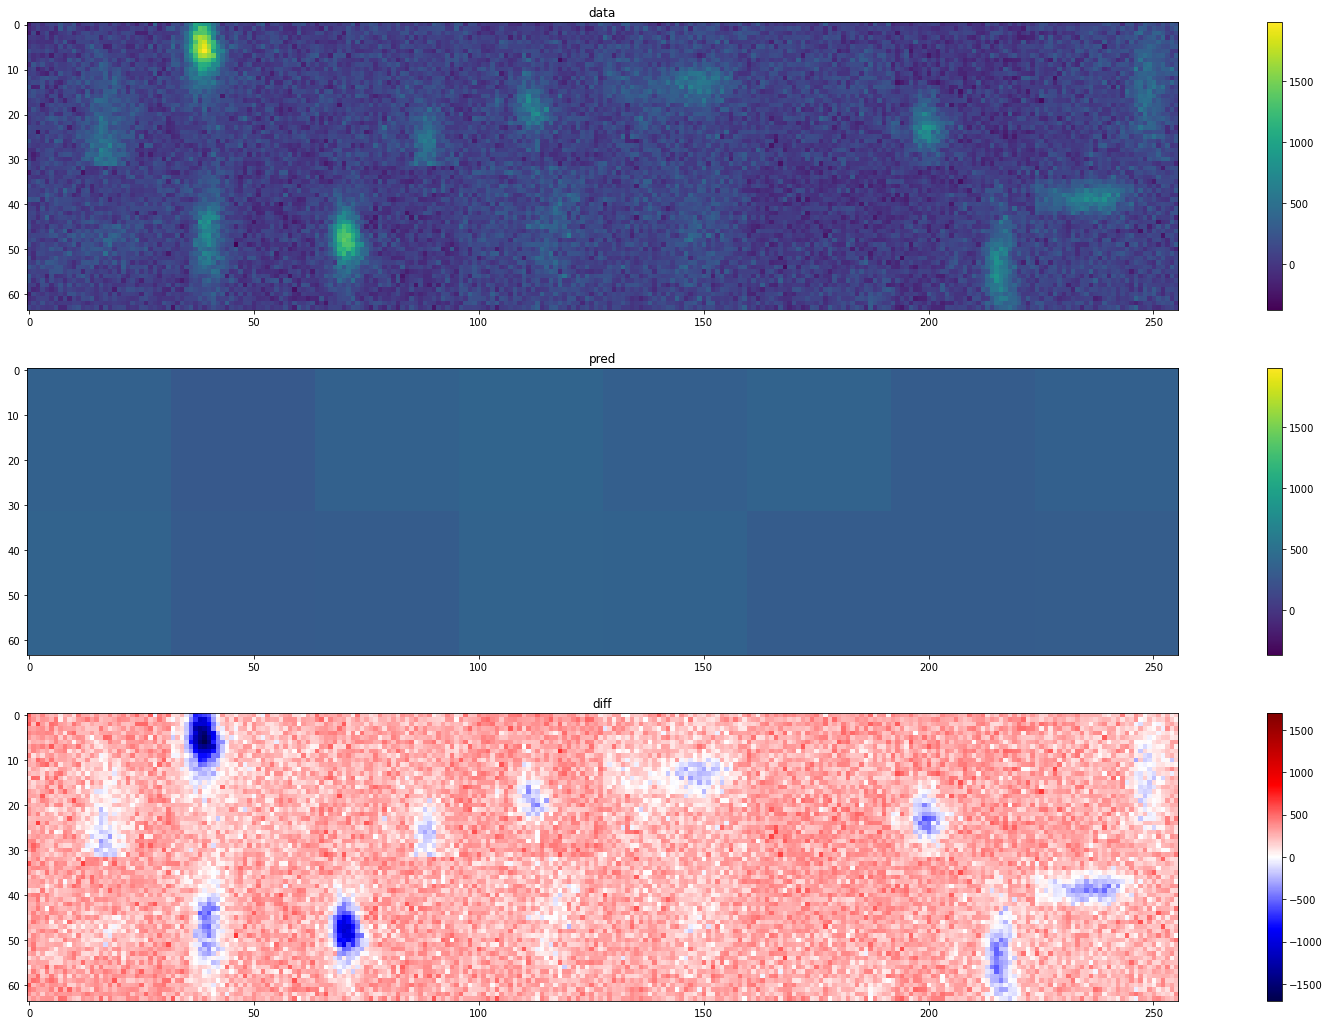

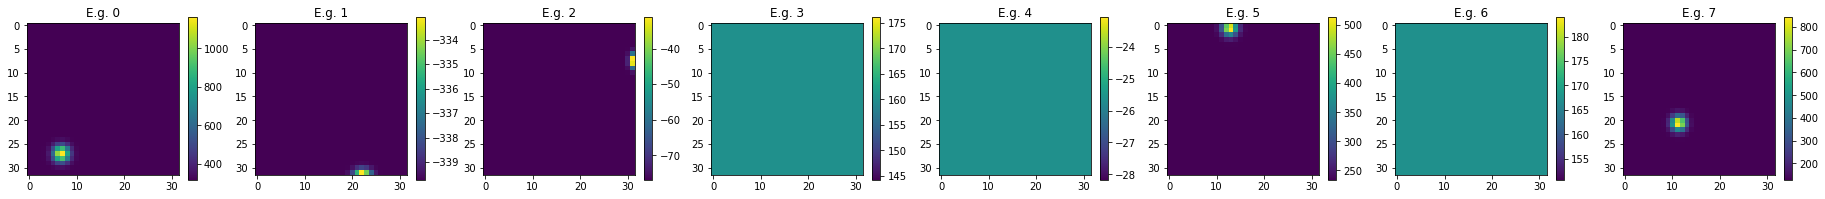

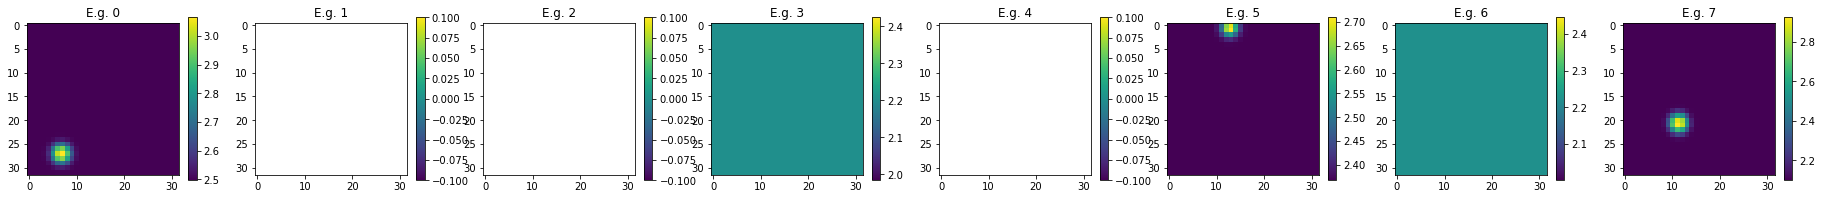

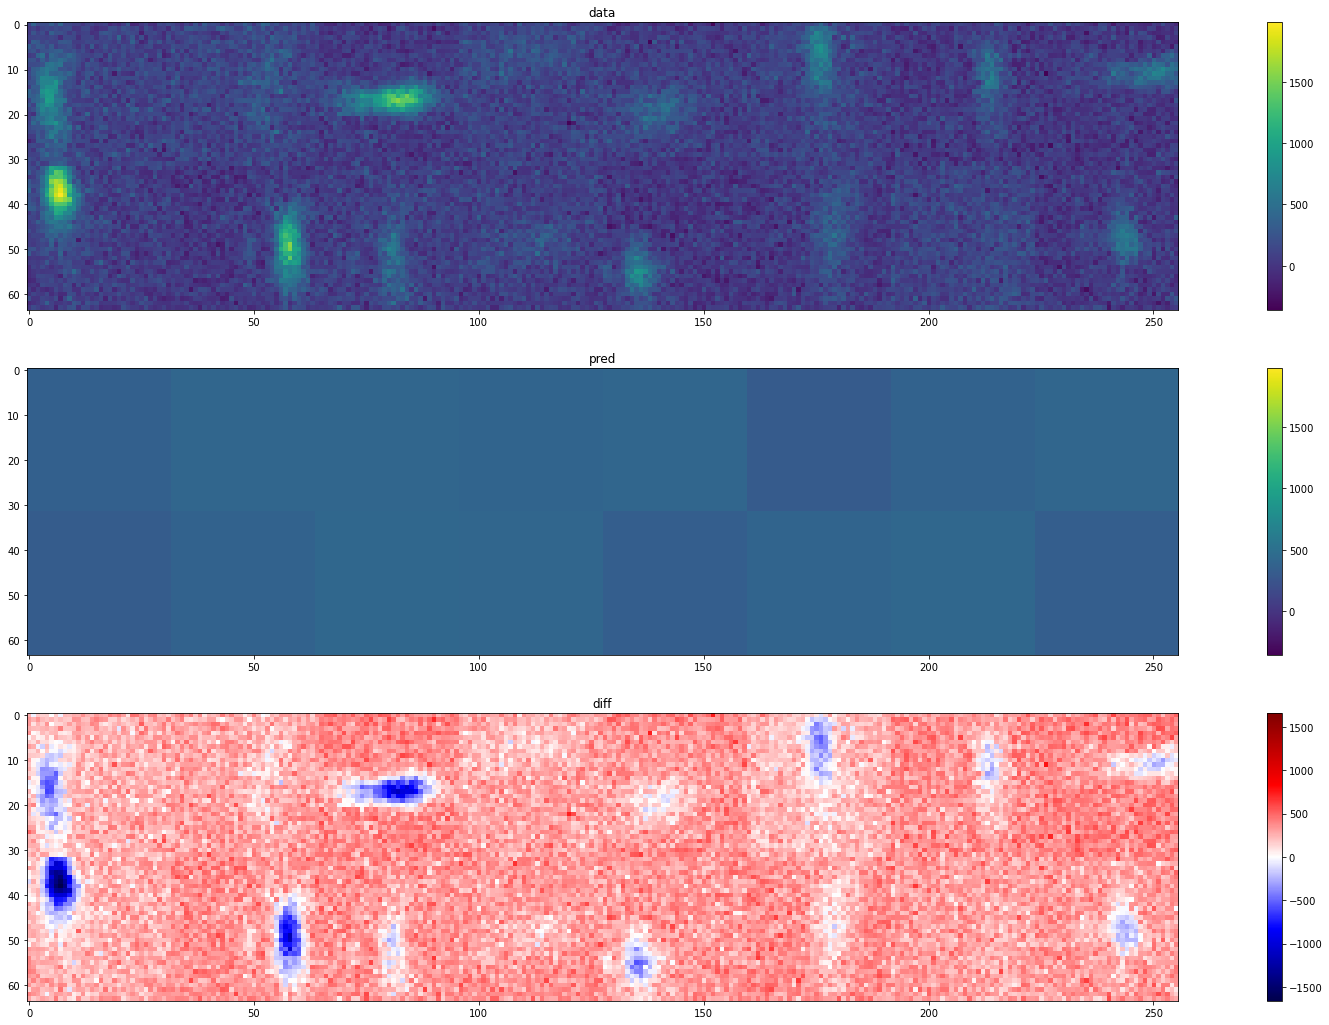

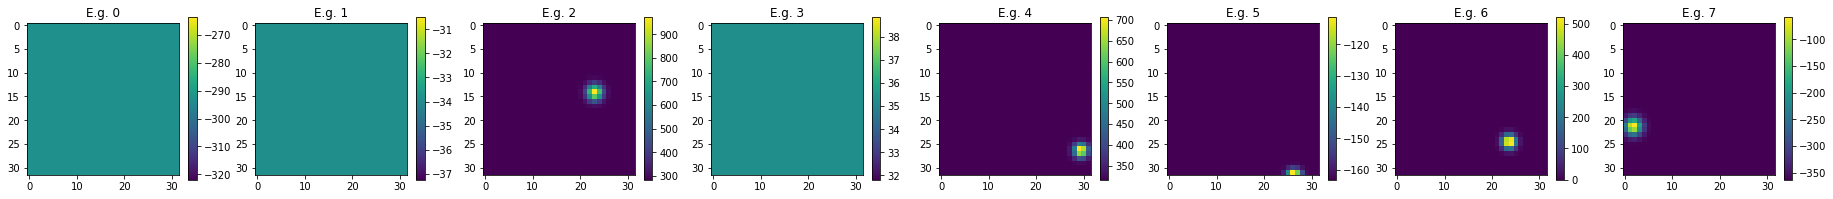

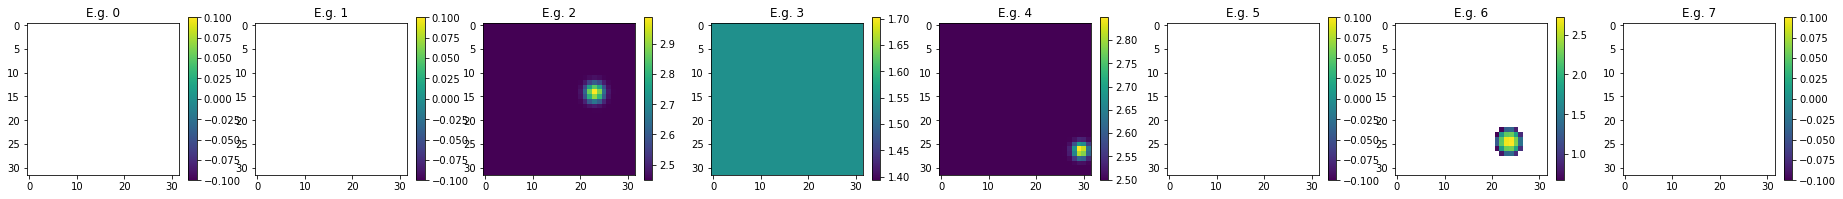

In [4]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-04-06_18-58-57_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Saved to : D:\Pytorch\runs\2022-04-06_18-58-57_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_l

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-59-01_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_l

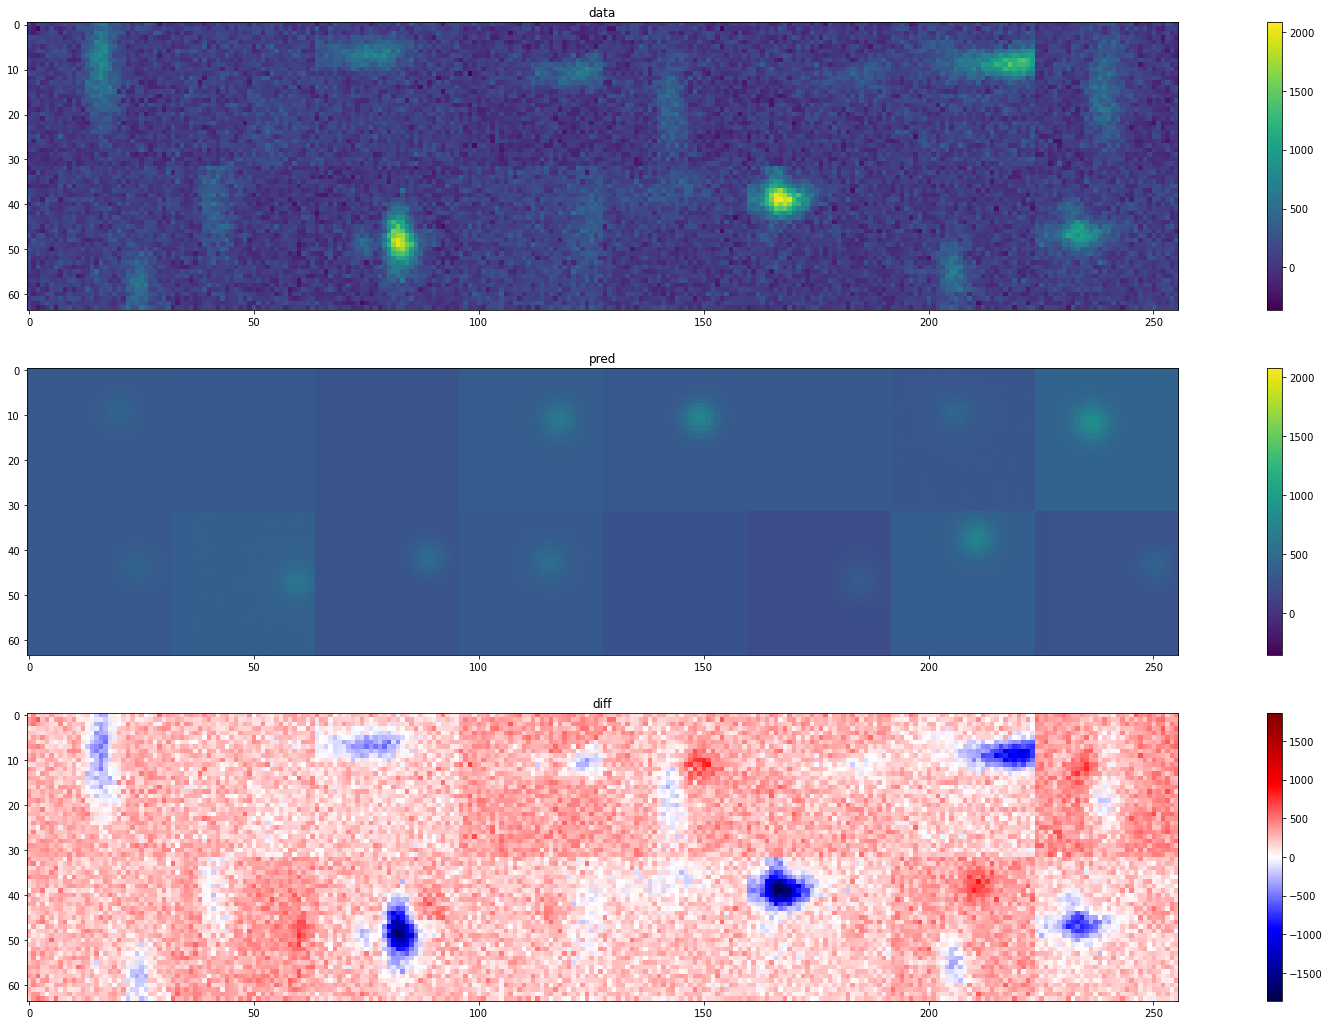

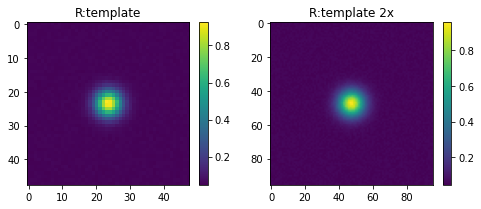

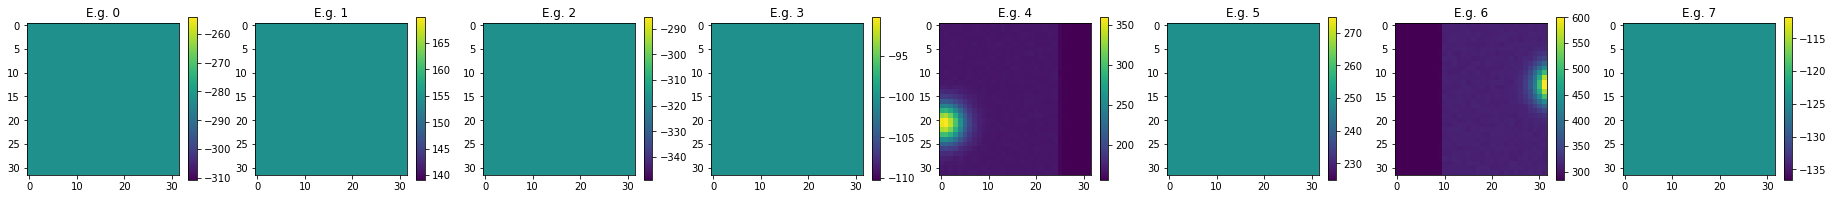

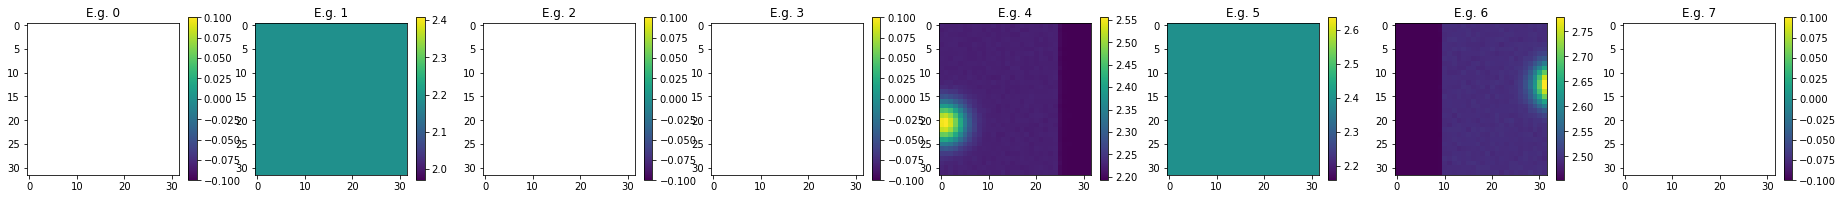

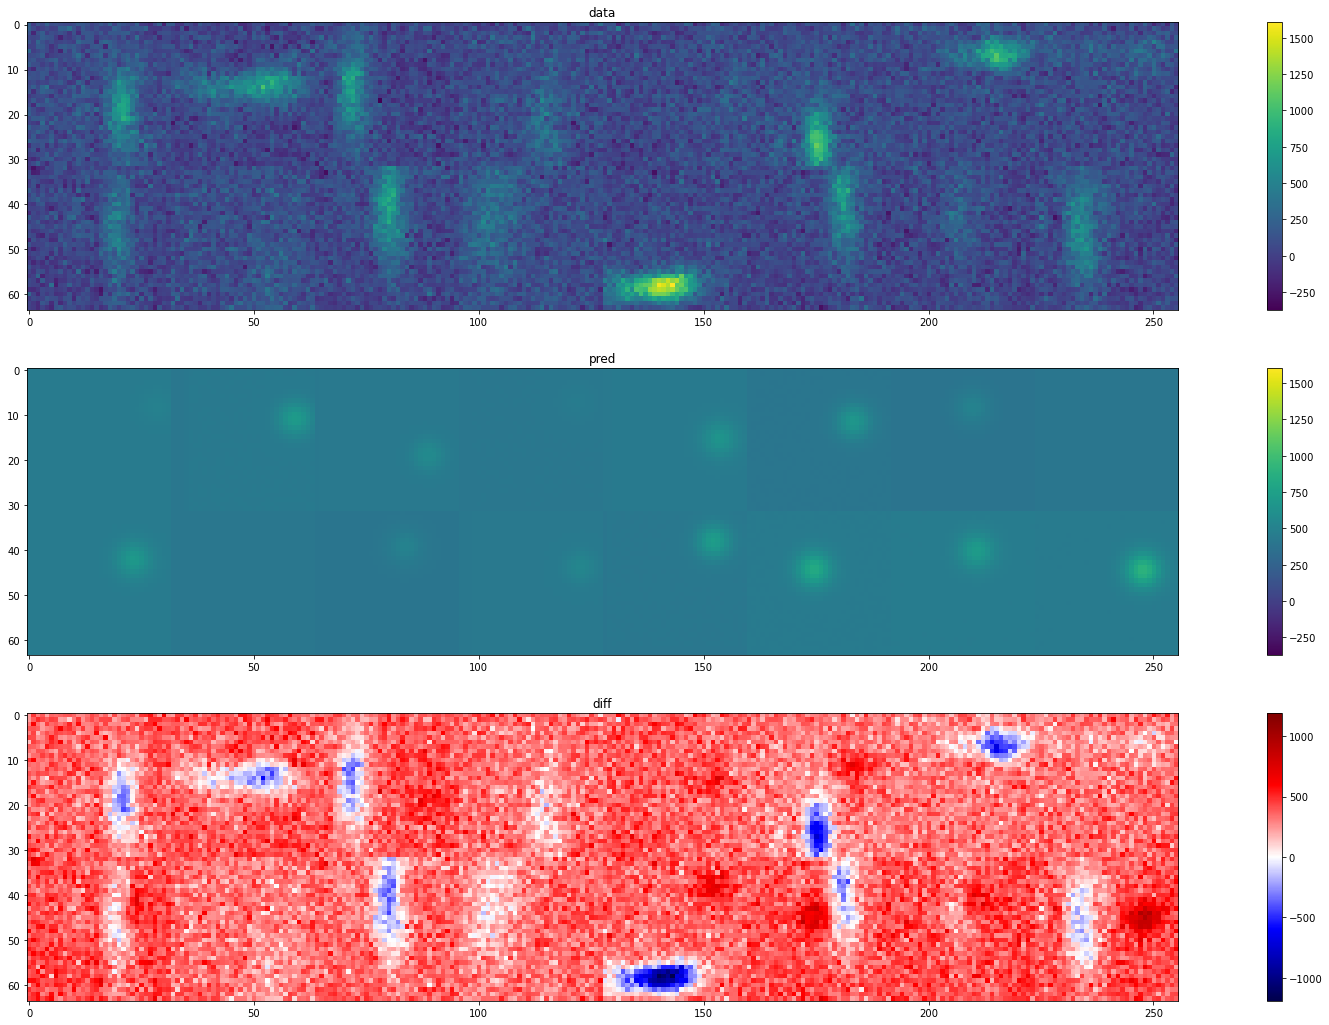

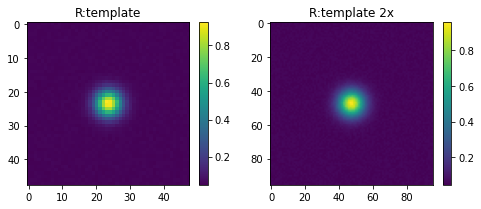

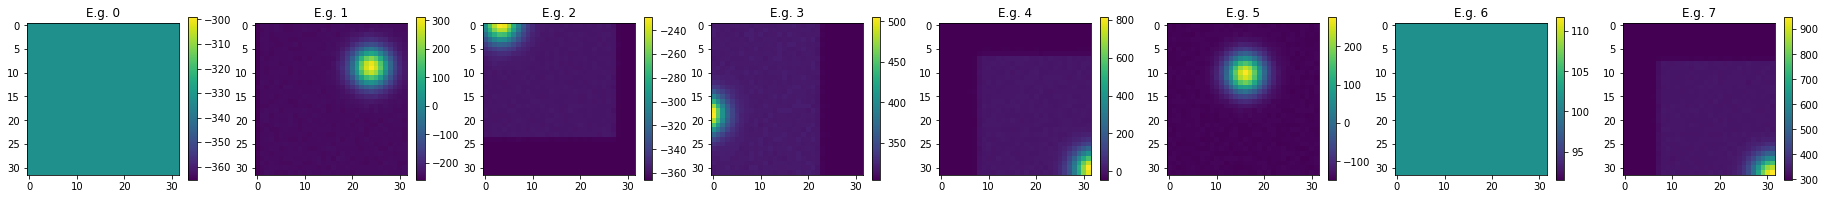

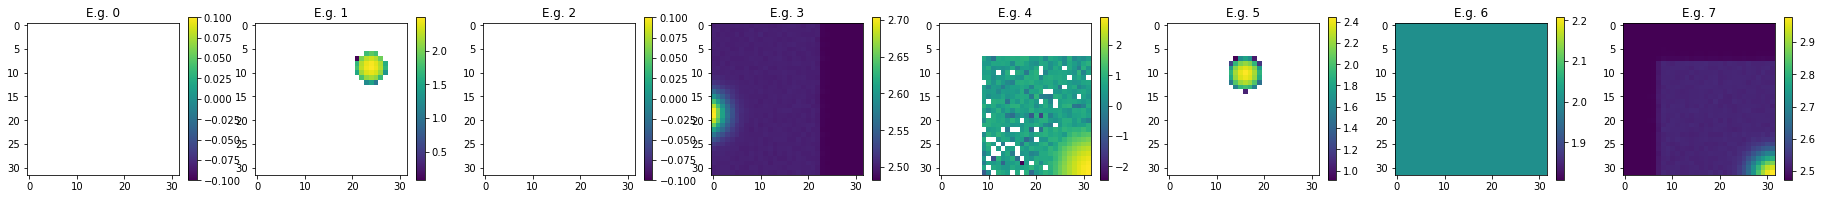

In [5]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-04-06_18-59-14_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-59-14_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bi

d:\github\smlm-dl\smlm_dl\model\base.py:145: RuntimeWarning: divide by zero encountered in log10
  im = axes[0, i].imshow(np.log10(img))


D:\Pytorch\runs\2022-04-06_18-59-14_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2022-04-06_18-59-14_DESKTOP-7NNT713\model.ptm, last modified: Wed Apr  6 18:59:14 2022
Layer (type:depth-idx)                   Param #
FourierOptics2DModel                     --
├─DirectMapperModel: 1-1                 --
│    └─ModuleDict: 2-1                   --
├─FourierOptics2DRenderer: 1-2           --
│    └─Sequential: 2-2                   --
│    │    └─ParameterModule: 3-1         1,024
├─ConvImageEncoderModel: 1-3             --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-2              2,480
│    │    └─Sequential: 3-3              13,888
│    │    └─Sequential: 3-4              55,424
│    └─ModuleDict: 2-4                   --
│    └─ModuleDict: 2-5                   --
│    │    └─Sequential

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-59-17_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bi

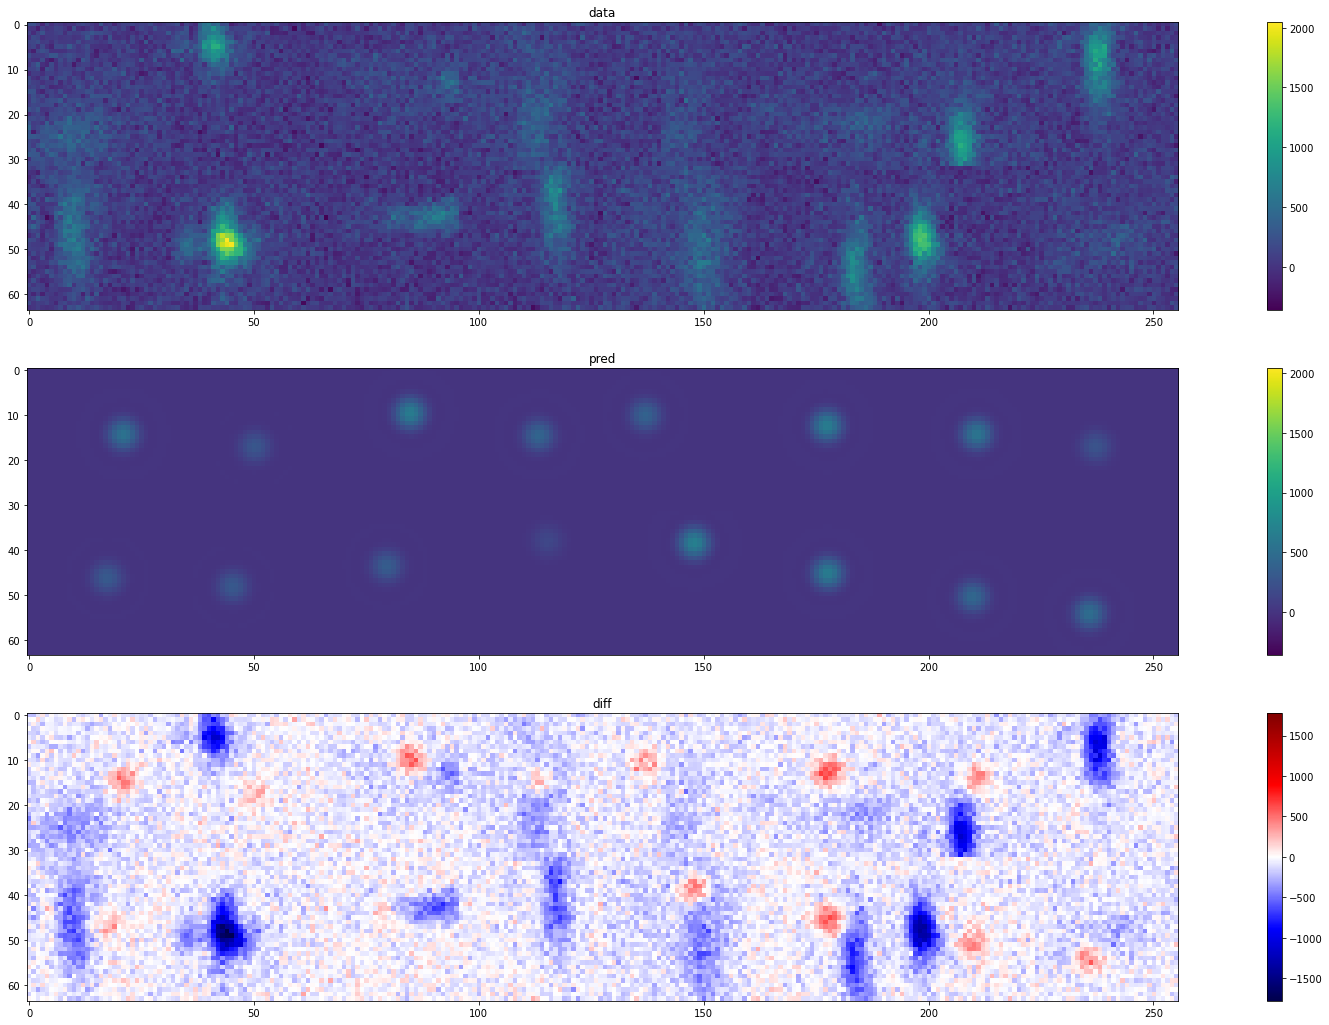

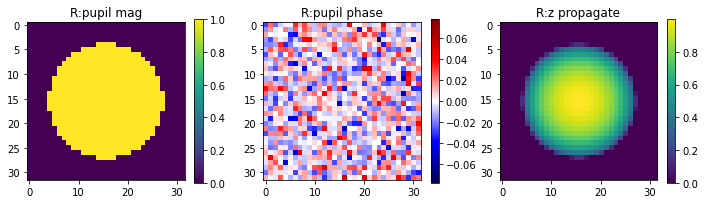

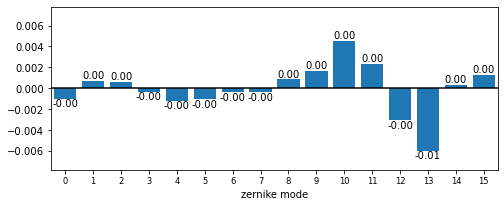

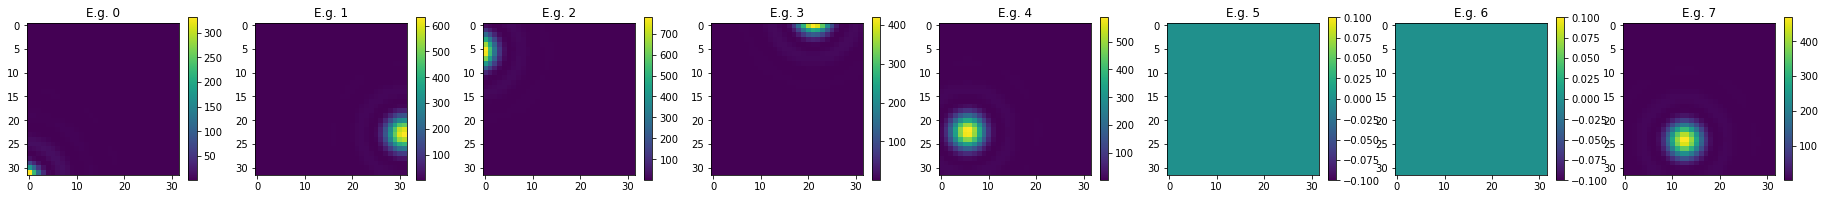

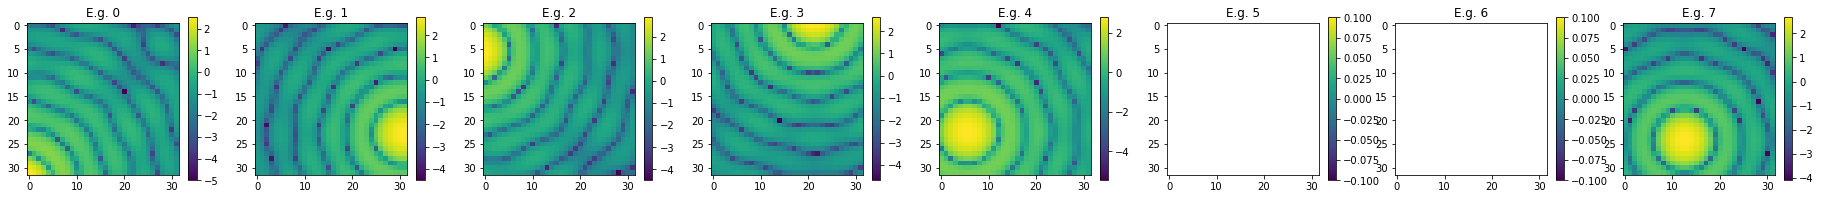

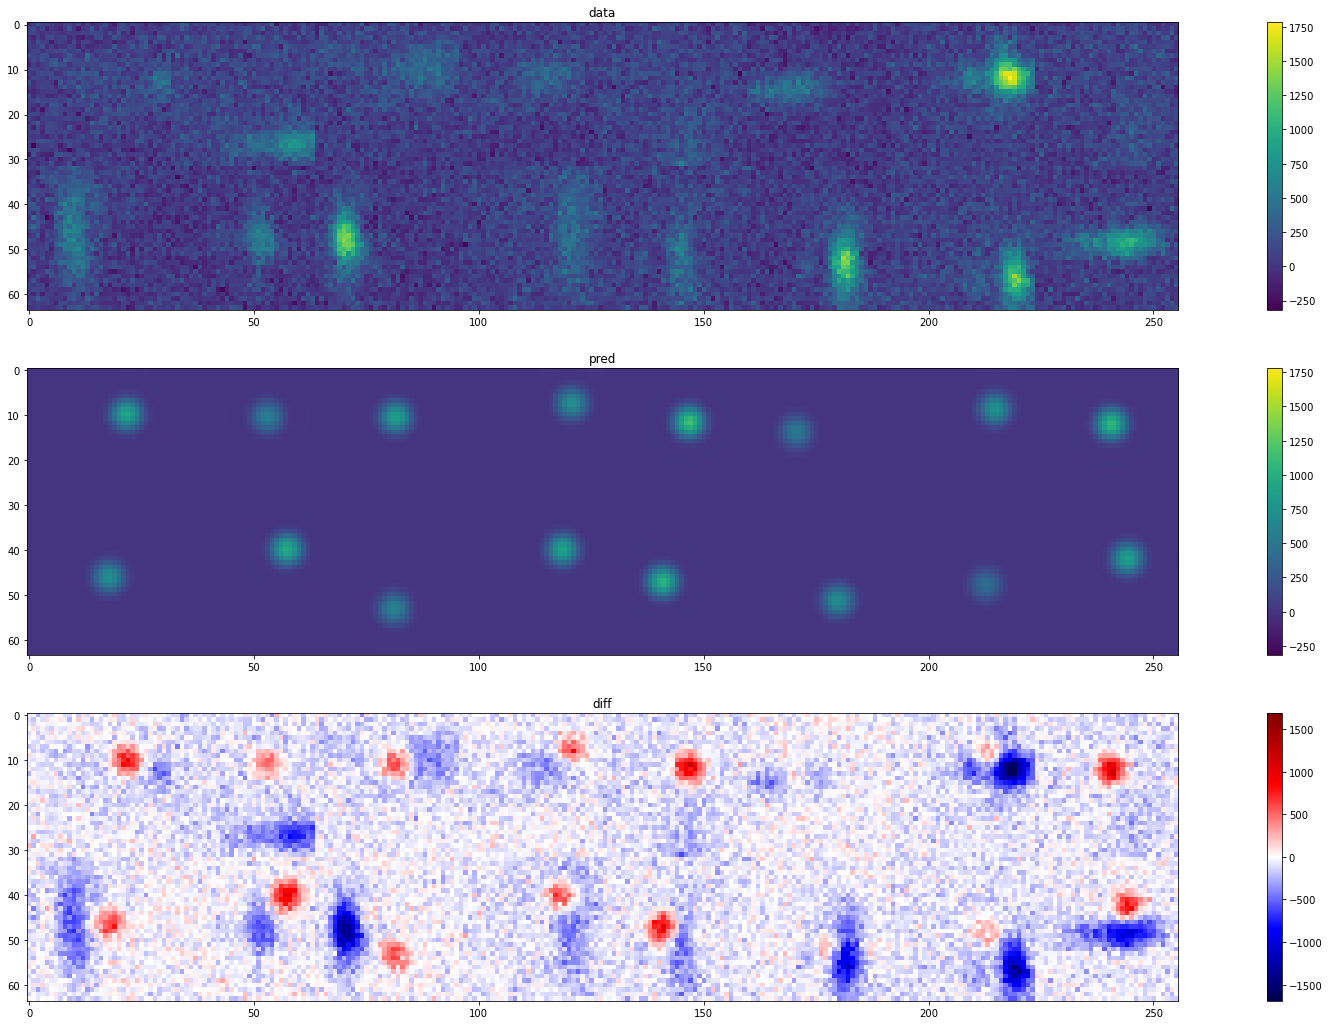

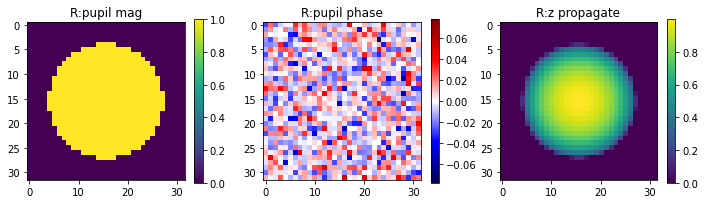

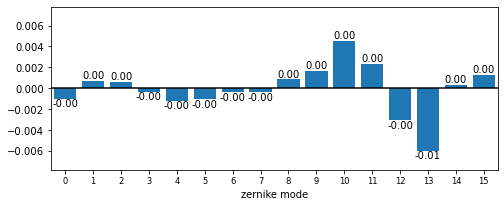

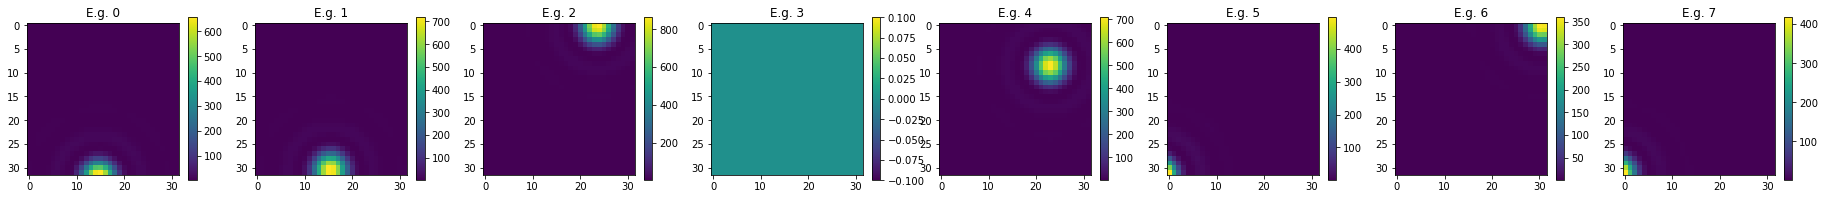

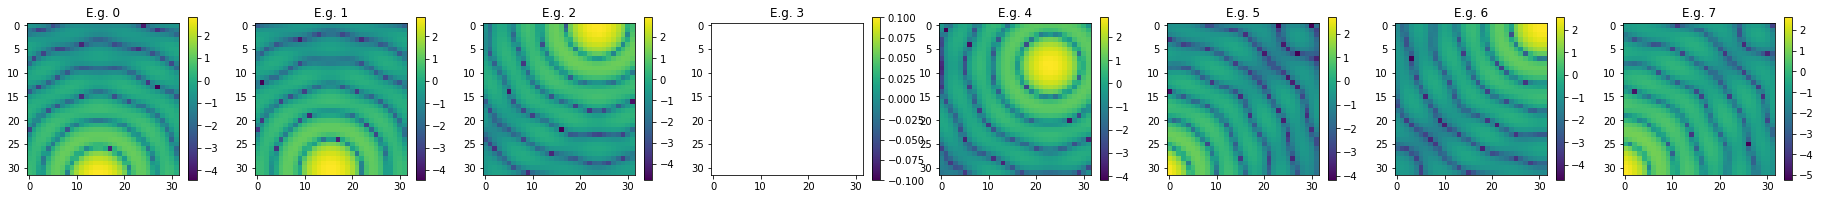

In [6]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-04-06_18-59-30_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-59-30_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'encoder.dec

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-04-06_18-59-41_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'encoder.dec

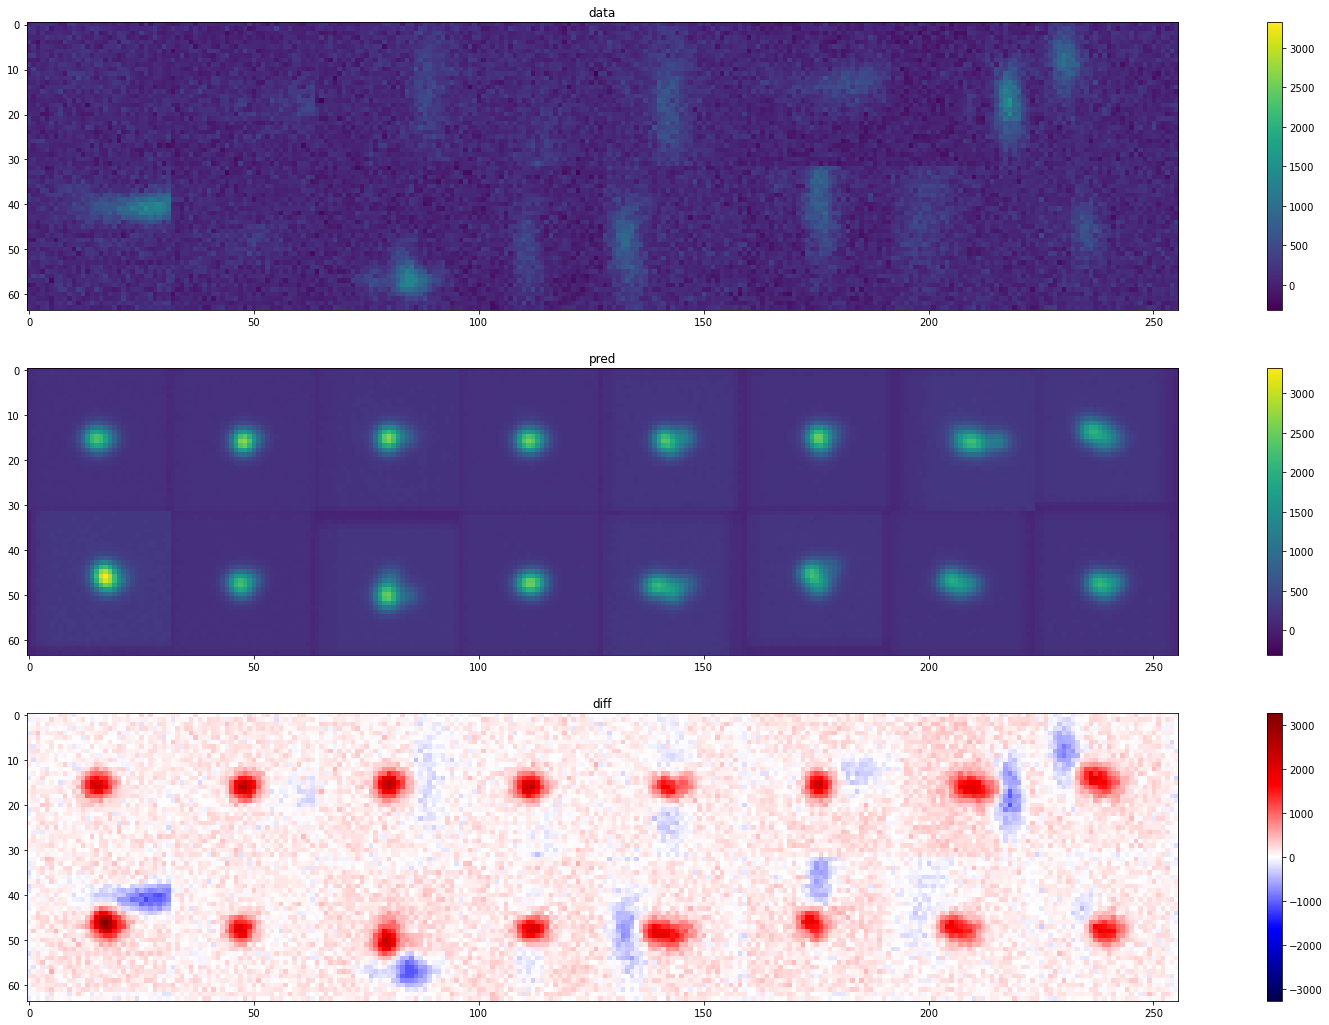

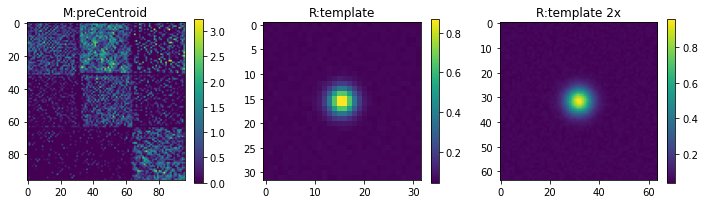

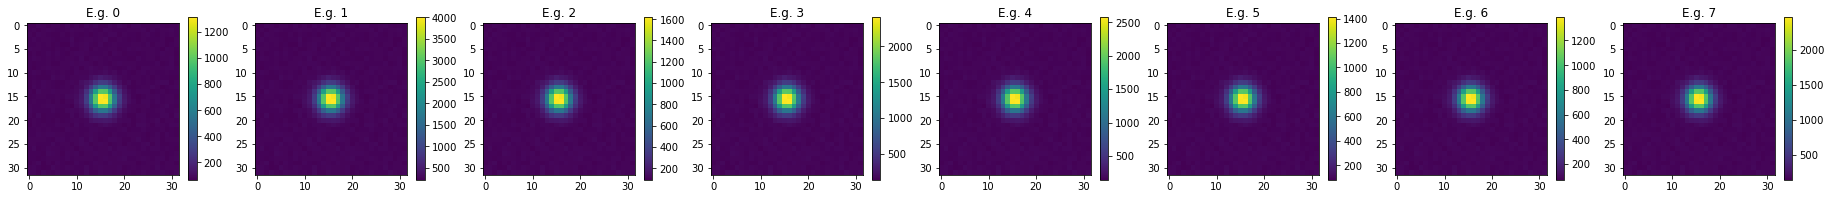

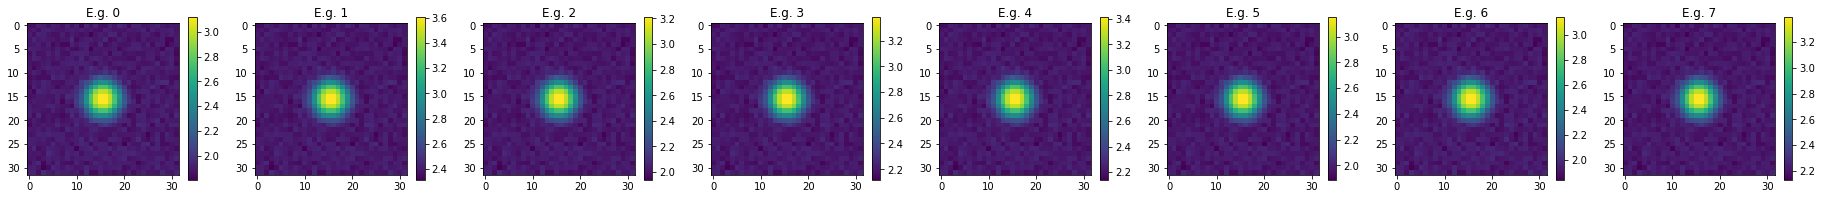

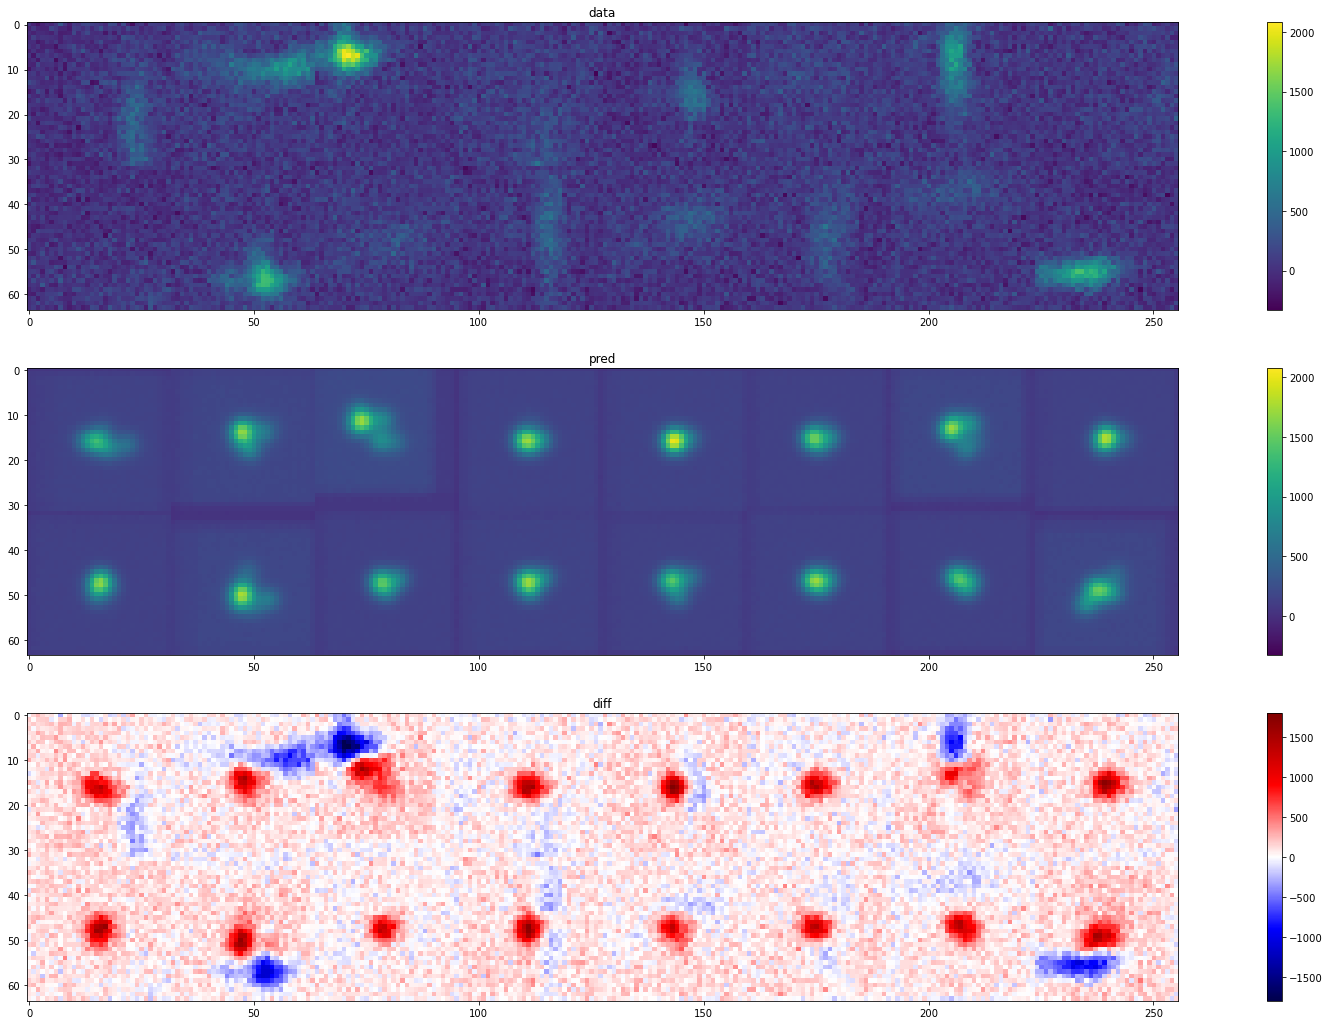

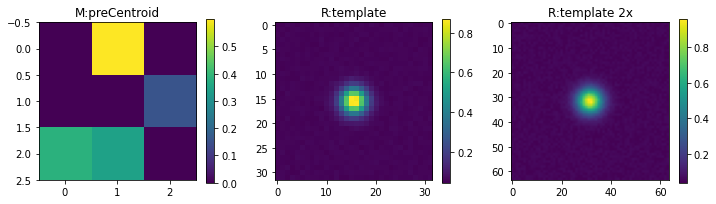

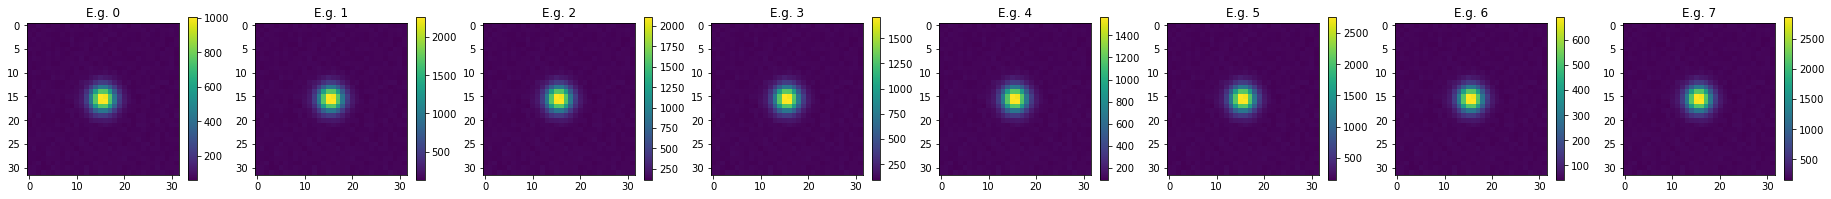

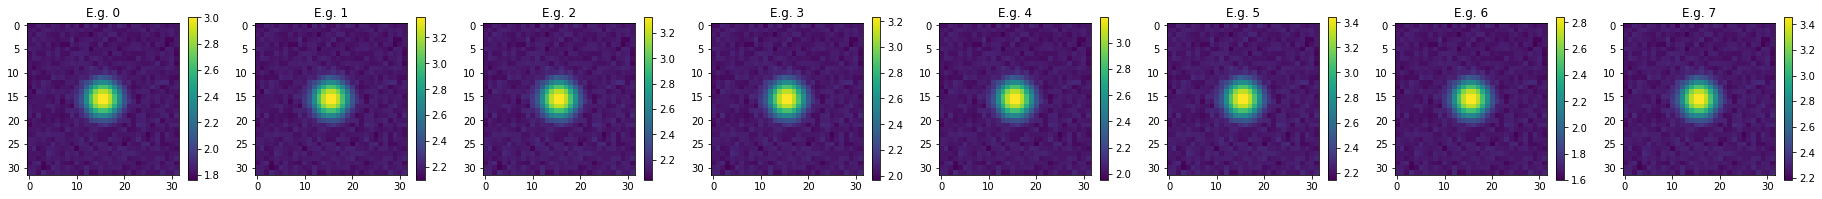

In [7]:
reload(trainer)


fitting_model = model.BaseFitModel(encoder_class=model.UnetEncoderModel,
                                   renderer_class=model.renderer.Template2DRenderer,
                                   mapper_class=model.mapper.CentroidMapperModel,
                                      fit_params=['x','y','A','bg'],
                                      max_psf_count=10,
                                      encoder_params={}
                                     )

training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=True)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )